In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pywt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow as tf
from keras.optimizers import SGD, Adam
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [18]:
df = pd.read_csv("ALL_5T.csv")
df.head()
print(df.isnull().sum())
#xử lí giá trị âm
colum_press = ['BO1016_Pressure(m)', 'BO1017_Pressure(m)', 'BO1021_Pressure', 'BO1022_Pressure(m)', 'BO1029_Pressure(m)', 'NB1019_Pressure', 'TD1029_Pressure', 'TD1043_Press(m)']
df[colum_press] = df[colum_press].apply(lambda x:x+5)
df.describe()
#tách tập trạng thái và tập điều khiển
df.set_index("Date_time", inplace=True) #set index
control = df["BOO_TM2_Pressure"]
state_ = df.drop([ "BOO_TM2_Pressure"], axis = 1)
features = state_.columns
scaler =MMS() #scale data
state = scaler.fit_transform(state_[features])
state = pd.DataFrame(columns=features, data=state, index = df.index)
print(state.head())


Date_time             0
BO1013_FLOW1          0
BO1016_Pressure(m)    0
BO1017_Pressure(m)    0
BO1021_FLOW1)         0
BO1021_Pressure       0
BO1022_flow1          0
BO1022_Pressure(m)    0
BO1017_FLOW1          0
BO1029_FLOW1          0
BO1029_Pressure(m)    0
NB1013_FLOW1          0
NB1017_FLOW1          0
NB1017_Pressure       0
NB1019_FLOW1          0
NB1019_Pressure       0
NB1020_FLOW1          0
NB1021_FLOW1          0
NB1022_FLOW1          0
TD1029_flow1          0
TD1029_Pressure       0
TD1043_FLOW1          0
TD1043_Press(m)       0
NMNBOOTM1_FLOW1       0
BOO_TM2_Pressure      0
dtype: int64
                BO1013_FLOW1  BO1016_Pressure(m)  BO1017_Pressure(m)  \
Date_time                                                              
9/15/2023 0:00      0.463406            0.616835            0.374450   
9/15/2023 0:05      0.459188            0.618765            0.379352   
9/15/2023 0:10      0.454970            0.620694            0.384254   
9/15/2023 0:15      0.45075

In [19]:
'''LSTM1 áp dụng lên tập state, window = 5'''
X = []
Y = []
u_control = []
# Loop qua các hàng của dataframe để lấy các cửa sổ thời gian t-5 đến t và giá trị tại t+1 cho Y
for i in range(5, len(df) - 1):
    X.append(state.iloc[i-5:i].values)  # Lấy cửa sổ thời gian state[0:5] ; state[5]
    Y.append(state.iloc[i])  # Lấy giá trị t+1 của state
    u_control.append(control.iloc[i])# Lấy giá trị t+1 của control
X = np.array(X)
Y = np.array(Y)
X.shape

(31384, 5, 23)

In [20]:
X_state_tr , y_state_tr = X[0:18000] , Y[0:18000]
X_state_te, y_state_te = X[18000:], Y[18000:]
# y_control_tr ,y_state_test, y_control_test = Y_control[7500:9000], Y_control[9000:]
# '''y_state_te + y_control_tr làm nguyên liệu train cho mode regressor, y_ '''
X_state_tr.shape

(18000, 5, 23)

In [21]:
# tạo biến thử
dense_act3 = ['ReLU', 'elu', 'tanh', 'sigmoid', 'selu'] 
recur_act3 = ['ReLU', 'elu', 'tanh', 'sigmoid', 'selu']
epoch3 = [100]
# epoch = [100, 256, 500]
learning_r3 = [0.001]
# learning_r = [0.0005, 0.001, 0.002] 
ls = 'mae'
# ls = ['mae', 'mse']
'''opt1 = SGD()
opt2 = Adam()'''
print('yes')
kind = []
sc = []

yes


In [11]:
for i in dense_act3:
    for j in recur_act3:
        for m in epoch3:
            for n in learning_r3:
                opt = Adam(learning_rate= n)
                model3 = Sequential([
                         tf.keras.layers.LSTM(128, recurrent_activation = j, input_shape = [5, 23]),
                         tf.keras.layers.Dropout(0.1),
                         tf.keras.layers.Dense(64, activation = i),
                         tf.keras.layers.Dropout(0.1),
                         tf.keras.layers.Dense(32, activation = i),
                         tf.keras.layers.Dense(23)
                         ])
                model3.compile(optimizer = opt, loss = ls, )
                apply3 = model3.fit(X_state_tr, y_state_tr, batch_size = 128, epochs = m, validation_split = 0.2)
                name = "model: "+ "dense_act3 "+ i+ " recur_act3 "+ j + " epoch3: " + str(m) +" ls "+ str(n)
                score = model3.evaluate(X_state_te, y_state_te)
                kind.append(name)
                sc.append(score)
a = np.min(sc)
b = sc.index(a)
print("loss_min "+str(a))
print(kind[b])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ainzo\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 5, 23), found shape=(None, 5, 24)


In [11]:
# '''Model_hyper2'''
# dense_act4 = [ 'tanh', 'sigmoid', 'selu'] 
# recur_act4 = [ 'tanh', 'sigmoid', 'selu']
# for i in dense_act4:
#     for j in recur_act4:
#         for m in epoch3:
#             for n in learning_r3:
#                 opt = SGD(learning_rate= n)
#                 model3 = Sequential([
#                          tf.keras.layers.LSTM(64, recurrent_activation = j, input_shape = [8, 1]),
#                          tf.keras.layers.Dropout(0.1),
#                          tf.keras.layers.Dense(32, activation = i),
#                          tf.keras.layers.Dropout(0.1),
#                          tf.keras.layers.Dense(16, activation = i),
#                          tf.keras.layers.Dense(8, activation = i),
#                          tf.keras.layers.Dense(1)
#                          ])
#                 model3.compile(optimizer = opt, loss = ls, )
#                 apply3 = model3.fit(X_control_tr, y_control_tr, batch_size = 1024, epochs = m, validation_split = 0.2)
#                 name = "model: "+ "dense_act3 "+ i+ " recur_act3 "+ j + " epoch3: " + str(m) +" ls "+ str(n)
#                 score = model3.evaluate(X_control_te, y_control_te)
#                 kind.append(name)
#                 kind.append(score)
#                 sc.append(score)
                


In [ ]:
len(sc)

In [10]:
# opt = Adam(learning_rate= 0.0002)
# model4 = Sequential([
#                          tf.keras.layers.LSTM(64, recurrent_activation = 'relu', input_shape = [8, 1]),
#                          tf.keras.layers.Dropout(0.1),
#                          tf.keras.layers.Dense(32, activation = 'relu'),
#                          tf.keras.layers.Dropout(0.1),
#                          tf.keras.layers.Dense(16, activation = 'relu'),
#                          tf.keras.layers.Dense(8, activation = 'sigmoid'),
#                          tf.keras.layers.Dense(1)
#                          ])
# # cp2 = ModelCheckpoint('model_hyper2_1/', loss = 'mae', save_best_only = True)
# model4.compile(optimizer = opt, loss = 'mae', )
# apply4 = model4.fit(X_control_tr, y_control_tr, batch_size = 1024, epochs = 1000, validation_split = 0.2)
# # name = "model: "+ "dense_act3 "+ i+ " recur_act3 "+ j + " epoch3: " + str(m) +" ls "+ str(n)
# score = model4.evaluate(X_control_te, y_control_te)

In [14]:
'''After hyper: tanh - sigmoid - 100 - 0.0002'''
opt = Adam(learning_rate= 0.0002)
model5 = Sequential([
                         tf.keras.layers.LSTM(128, recurrent_activation = 'sigmoid', input_shape = [5, 23]),
                         tf.keras.layers.Dropout(0.1),
                         tf.keras.layers.Dense(64, activation = 'tanh'),
                         tf.keras.layers.Dropout(0.1),
                         tf.keras.layers.Dense(32, activation = 'tanh'),
                         tf.keras.layers.Dense(23)
                         ])
model5.compile(optimizer = opt, loss = ls, )
apply5 = model5.fit(X_state_tr, y_state_tr, batch_size = 64, epochs = 1000, validation_split = 0.2)
Y_pre = model5.predict(X_state_te)

Epoch 1/1000
225/225 [==============================] - 6s 13ms/step - loss: 0.1699 - val_loss: 0.0620
Epoch 2/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0731 - val_loss: 0.0524
Epoch 3/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0569 - val_loss: 0.0442
Epoch 4/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0487 - val_loss: 0.0379
Epoch 5/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0434 - val_loss: 0.0357
Epoch 6/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0396 - val_loss: 0.0331
Epoch 7/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0370 - val_loss: 0.0315
Epoch 8/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0344 - val_loss: 0.0297
Epoch 9/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0324 - val_loss: 0.0279
Epoch 10/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.

225/225 [==============================] - 2s 9ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 81/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0147 - val_loss: 0.0128
Epoch 82/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0117
Epoch 83/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0147 - val_loss: 0.0125
Epoch 84/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0119
Epoch 85/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0146 - val_loss: 0.0123
Epoch 86/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0147 - val_loss: 0.0117
Epoch 87/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0123
Epoch 88/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0130
Epoch 89/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0145 -

Epoch 159/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0138 - val_loss: 0.0121
Epoch 160/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 161/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0139 - val_loss: 0.0131
Epoch 162/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0137 - val_loss: 0.0116
Epoch 163/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0138 - val_loss: 0.0116
Epoch 164/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 165/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0138 - val_loss: 0.0120
Epoch 166/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0137 - val_loss: 0.0121
Epoch 167/1000
225/225 [==============================] - 2s 11ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 168/1000
225/225 [==============================] - 

225/225 [==============================] - 2s 9ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 316/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 317/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 318/1000
225/225 [==============================] - 2s 11ms/step - loss: 0.0109 - val_loss: 0.0115
Epoch 319/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0109 - val_loss: 0.0113
Epoch 320/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0109 - val_loss: 0.0114
Epoch 321/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 322/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0108 - val_loss: 0.0110
Epoch 323/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 324/1000
225/225 [==============================] - 2s 9ms/step - los

225/225 [==============================] - 3s 14ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 472/1000
225/225 [==============================] - 3s 13ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 473/1000
225/225 [==============================] - 3s 13ms/step - loss: 0.0101 - val_loss: 0.0106
Epoch 474/1000
225/225 [==============================] - 3s 15ms/step - loss: 0.0102 - val_loss: 0.0105
Epoch 475/1000
225/225 [==============================] - 4s 18ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 476/1000
225/225 [==============================] - 3s 15ms/step - loss: 0.0102 - val_loss: 0.0112
Epoch 477/1000
225/225 [==============================] - 3s 14ms/step - loss: 0.0101 - val_loss: 0.0106
Epoch 478/1000
225/225 [==============================] - 3s 14ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 479/1000
225/225 [==============================] - 4s 17ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 480/1000
225/225 [==============================] - 4s 18ms/step

225/225 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 628/1000
225/225 [==============================] - 2s 11ms/step - loss: 0.0098 - val_loss: 0.0104
Epoch 629/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 630/1000
225/225 [==============================] - 2s 11ms/step - loss: 0.0098 - val_loss: 0.0105
Epoch 631/1000
225/225 [==============================] - 3s 12ms/step - loss: 0.0097 - val_loss: 0.0106
Epoch 632/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 633/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0108
Epoch 634/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0105
Epoch 635/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0103
Epoch 636/1000
225/225 [==============================] - 2s 9ms/step - los

225/225 [==============================] - 3s 13ms/step - loss: 0.0096 - val_loss: 0.0107
Epoch 784/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0096 - val_loss: 0.0105
Epoch 785/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 786/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 787/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0105
Epoch 788/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0095 - val_loss: 0.0102
Epoch 789/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0104
Epoch 790/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 791/1000
225/225 [==============================] - 2s 10ms/step - loss: 0.0095 - val_loss: 0.0101
Epoch 792/1000
225/225 [==============================] - 2s 10ms/step - lo

225/225 [==============================] - 2s 8ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 940/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 941/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 942/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 943/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 944/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 945/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 946/1000
225/225 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 947/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 948/1000
225/225 [==============================] - 2s 10ms/step - loss: 

In [22]:
print(Y_pre.shape)
# sử dụng Y_pre[6000:9000] và u_control[6000:9000] để train cho model hồi quy
Y_re_train = Y_pre[0:9000]
u_re_train = u_control[18000:27000]
Y_re_te = Y_pre[9000:]
u_re_te = u_control[27000:]

(13384, 23)


In [23]:
'''build thành phần regression'''
# tach X_svr, y_svr, state, control
'''Thử với SVR: lấy y_pre và u để train'''
param_grid = {'C': [10, 5, 2, 1, 0.5],  
              'gamma': [ 0.001, 0.0001], 
              'kernel': ['rbf','linear','sigmoid','poly']
               }  
X_svr = state
y_svr = control
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, error_score='raise')   
# fitting the model for grid search 
grid.fit(Y_re_train, u_re_train) 
print(grid.best_estimator_)



Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.885 total time=   1.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.809 total time=   0.9s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.925 total time=   1.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.895 total time=   1.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.887 total time=   1.1s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.910 total time=   1.6s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.775 total time=   1.2s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.922 total time=   1.7s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.914 total time=   1.4s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.888 total time=   1.5s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.859 total time=   0.8s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid

[CV 2/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.414 total time=   2.9s
[CV 3/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.446 total time=   2.5s
[CV 4/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.397 total time=   2.7s
[CV 5/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.387 total time=   2.9s
[CV 1/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.908 total time=   0.9s
[CV 2/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.776 total time=   0.7s
[CV 3/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.924 total time=   0.9s
[CV 4/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.913 total time=   0.7s
[CV 5/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.888 total time=   0.6s
[CV 1/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.350 total time=   2.0s
[CV 2/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.336 total time=   2.0s
[CV 3/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.340 total time=   1.9s
[CV 4/5] END .C=2, gamma=0.0

In [24]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.5, 'gamma': 0.001, 'kernel': 'linear'}


0.07336332971328041


'hơi tệ :v'

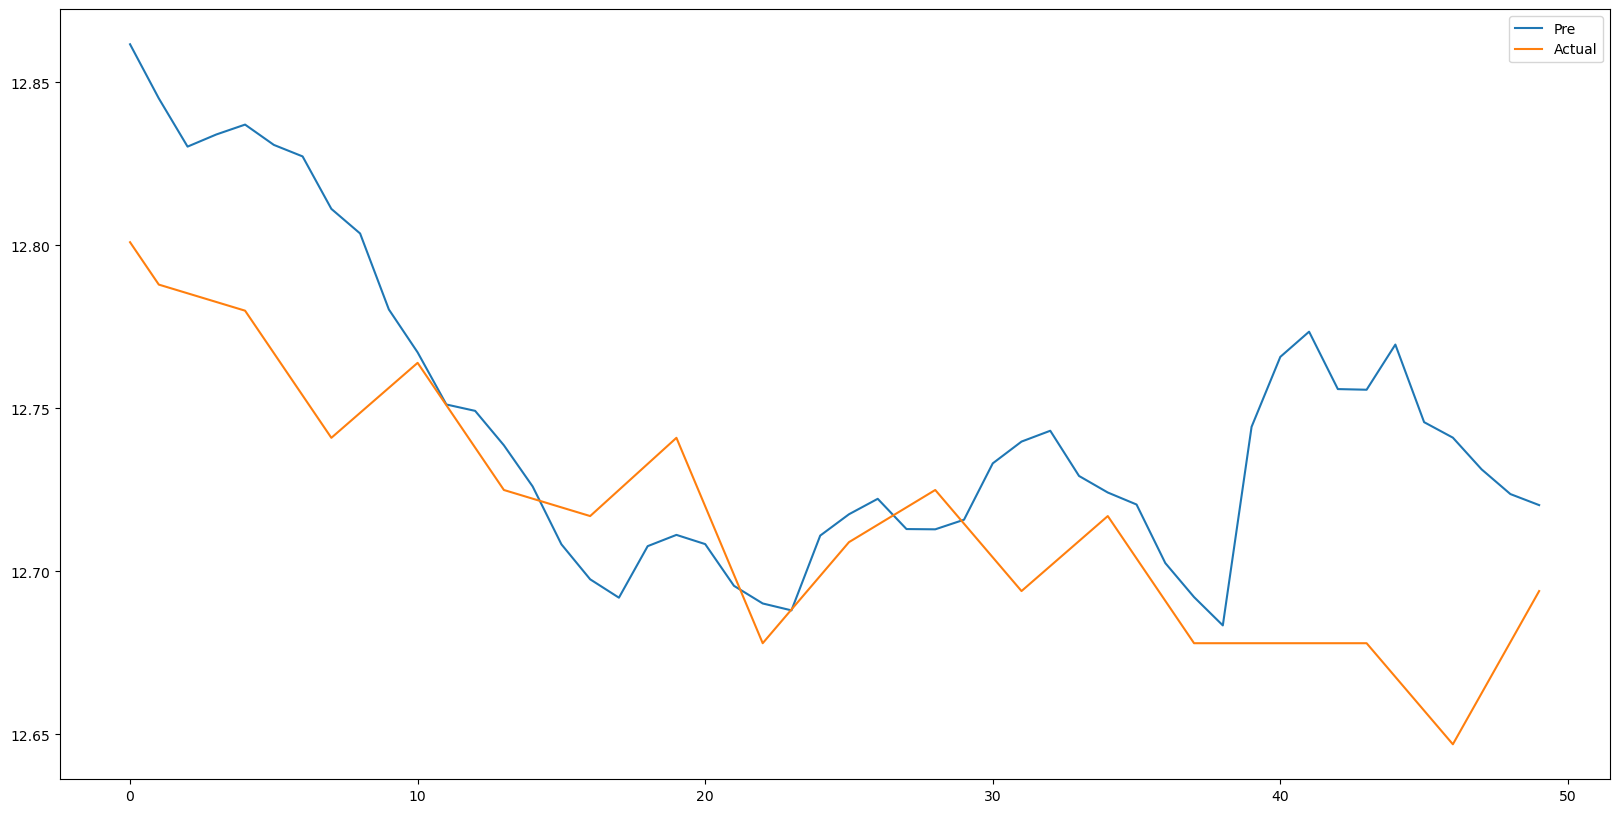

In [28]:
model_svr = SVR(C=0.5, kernel = 'linear', gamma = 0.001,)
model_svr.fit(Y_re_train, u_re_train)
y_pre_svr = model_svr.predict(Y_re_te)
from sklearn.metrics import mean_absolute_error as mae

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(20,10))
    plt.plot(df['Predictions'][start:end], label = 'Pre')
    plt.plot(df['Actuals'][start:end], label = 'Actual')
    plt.legend()
    return df, mae(y, predictions)
plot_predictions1(model_svr, Y_re_te, u_re_te, start=0, end=50)
print(mae(u_re_te, y_pre_svr))
'''hơi tệ :v'''

In [29]:
'''Thử với SVR: lấy y_state và u để tìm'''
param_grid = {'C': [10, 5, 2, 1, 0.5, 0.1, 0.05, 0.01],  
              'gamma': [ 0.001, 0.0001], 
              'kernel': ['rbf','linear','sigmoid','poly']
               }  
X_svr = state
y_svr = control
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, error_score='raise')   
# fitting the model for grid search 
grid.fit(X_svr, y_svr) 
print(grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.007 total time=  18.9s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.814 total time=  21.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.807 total time=  21.4s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.810 total time=  20.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.799 total time=  19.8s
[CV 1/5] END .C=10, gamma=0.001, kernel=linear;, score=-0.066 total time=  25.6s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.819 total time=  31.1s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.827 total time=  32.2s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.022 total time=  25.5s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.784 total time=  27.2s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.056 total time=  12.9s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid

[CV 2/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.616 total time=  45.1s
[CV 3/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.589 total time=  46.5s
[CV 4/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.645 total time=  45.4s
[CV 5/5] END .....C=2, gamma=0.0001, kernel=rbf;, score=0.658 total time=  45.1s
[CV 1/5] END .C=2, gamma=0.0001, kernel=linear;, score=-0.066 total time=  22.2s
[CV 2/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.820 total time=  28.9s
[CV 3/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.827 total time=  25.9s
[CV 4/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.341 total time=  23.2s
[CV 5/5] END ..C=2, gamma=0.0001, kernel=linear;, score=0.785 total time=  26.2s
[CV 1/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.600 total time=  39.0s
[CV 2/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.491 total time=  38.5s
[CV 3/5] END .C=2, gamma=0.0001, kernel=sigmoid;, score=0.480 total time=  38.2s
[CV 4/5] END .C=2, gamma=0.0

[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.544 total time=  51.8s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.545 total time=  53.4s
[CV 1/5] END C=0.1, gamma=0.001, kernel=linear;, score=-0.049 total time=  15.2s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.822 total time=  17.3s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.821 total time=  16.8s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.803 total time=  16.3s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.793 total time=  16.2s
[CV 1/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.485 total time=  44.1s
[CV 2/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.356 total time=  40.2s
[CV 3/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.368 total time=  42.0s
[CV 4/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.429 total time=  42.2s
[CV 5/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.428 total time=  40.8s
[CV 1/5] END ..C=0.1, gamma=

[CV 5/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.027 total time=  56.6s
[CV 1/5] END C=0.01, gamma=0.0001, kernel=linear;, score=0.055 total time=   9.2s
[CV 2/5] END C=0.01, gamma=0.0001, kernel=linear;, score=0.806 total time=  12.3s
[CV 3/5] END C=0.01, gamma=0.0001, kernel=linear;, score=0.794 total time=  11.8s
[CV 4/5] END C=0.01, gamma=0.0001, kernel=linear;, score=0.802 total time=  11.5s
[CV 5/5] END C=0.01, gamma=0.0001, kernel=linear;, score=0.800 total time=  11.3s
[CV 1/5] END C=0.01, gamma=0.0001, kernel=sigmoid;, score=-0.067 total time=  43.8s
[CV 2/5] END C=0.01, gamma=0.0001, kernel=sigmoid;, score=-0.133 total time=  39.4s
[CV 3/5] END C=0.01, gamma=0.0001, kernel=sigmoid;, score=-0.030 total time=  39.9s
[CV 4/5] END C=0.01, gamma=0.0001, kernel=sigmoid;, score=-0.036 total time=  40.8s
[CV 5/5] END C=0.01, gamma=0.0001, kernel=sigmoid;, score=0.001 total time=  39.4s
[CV 1/5] END C=0.01, gamma=0.0001, kernel=poly;, score=-0.106 total time=  32.4s
[CV 2/5] 